In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


In [2]:
df=pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

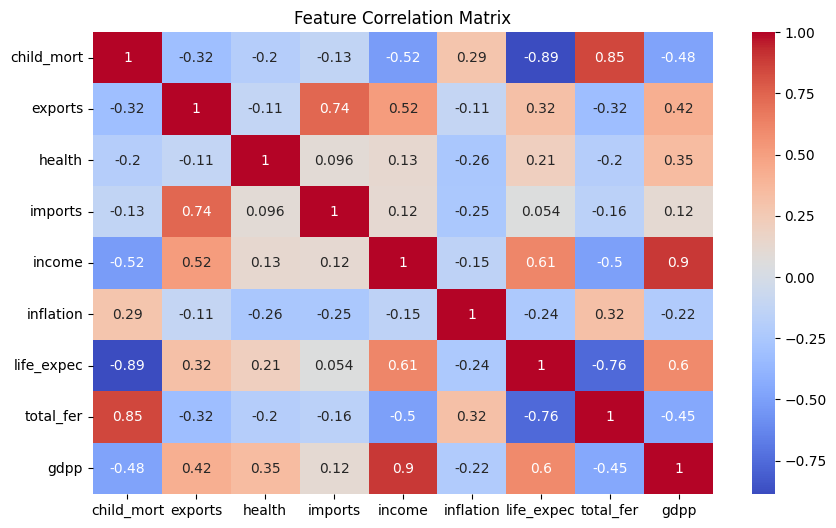

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('country',axis=1).corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()            


In [9]:
df=df.drop(columns=["country"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [12]:
inertia=[]
silhouette=[]
k=range(2,15)
for k in k :
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))
    
    

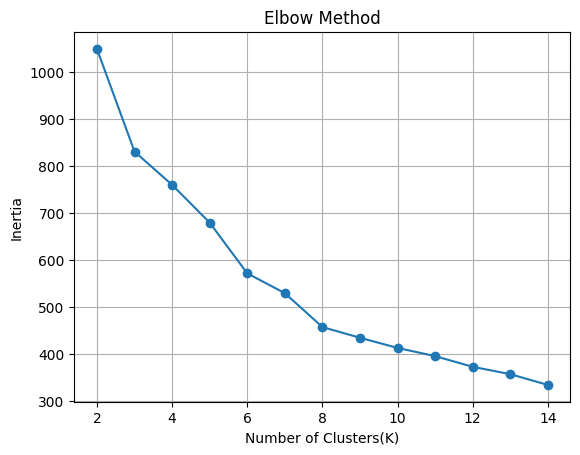

In [13]:
k_values = list(range(2, 15))
plt.plot(k_values,inertia,marker='o')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

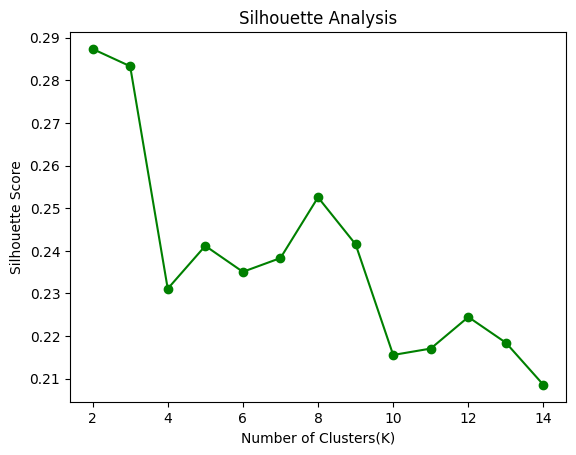

In [14]:
plt.plot(k_values,silhouette,marker='o',color='green')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [15]:
best_k=8
kmeans=KMeans(n_clusters=8,n_init='auto',random_state=42)
labels  = kmeans.fit_predict(X_scaled) 
df['Titles'] = labels

In [16]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Titles
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,6
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5


In [17]:
cluster_summary = (
    df.groupby('Titles')      
      .mean()
      .round(2)
      .sort_values('gdpp', ascending=False)  
)



In [18]:
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Titles,,,,,,,,,
7,4.15,157.75,7.39,139.12,59450.00,1.05,81.18,1.55,55350.00
4,4.30,37.90,10.57,36.05,40018.18,1.54,80.91,1.80,45268.18
2,10.70,65.56,3.28,38.70,67171.43,12.52,76.93,2.29,34057.14
5,15.88,51.16,6.68,58.20,14756.67,3.81,74.06,2.01,8850.90
6,28.74,26.17,5.47,30.77,10016.18,12.04,72.09,2.60,4890.76
0,56.28,31.58,10.32,68.36,4895.00,5.43,59.94,3.47,2815.00
3,130.00,25.30,5.07,17.40,5150.00,104.00,60.50,5.84,2330.00
1,98.02,28.99,5.74,39.34,3355.87,10.84,59.25,5.24,1609.26


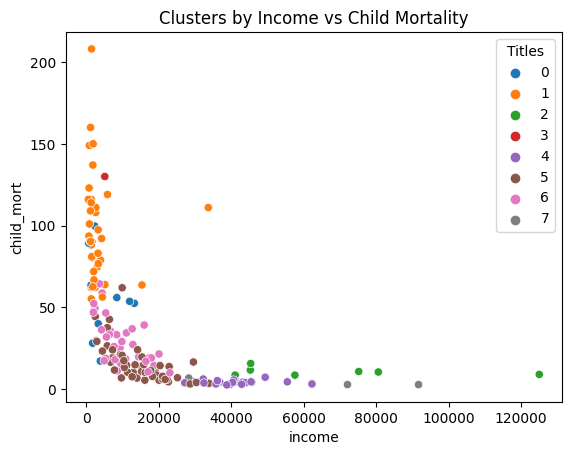

In [19]:
sns.scatterplot(data=df,x='income',y='child_mort',hue='Titles',palette='tab10')
plt.title("Clusters by Income vs Child Mortality")
plt.show()

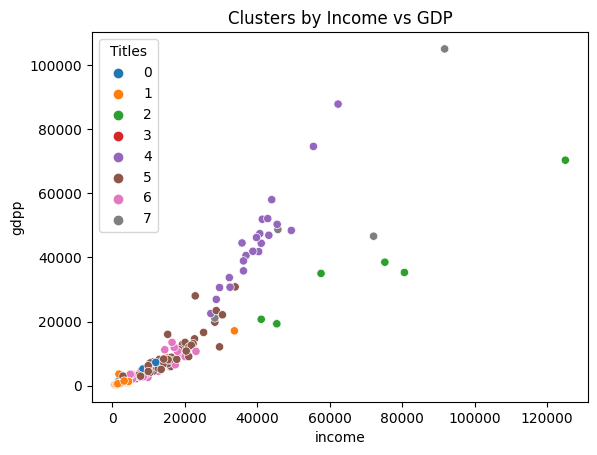

In [20]:
sns.scatterplot(data=df,x='income',y='gdpp',hue='Titles',palette='tab10')
plt.title("Clusters by Income vs GDP")
plt.show()